In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Data preprocessing for given dataset

## 1. Data cleaning

### 1.1. Importing data and providing information

In [2]:
df=pd.read_csv('AMZN.csv')
# fb=pd.read_csv('FB.csv')
# gg=pd.read_csv('GOOGL.csv')
# ibm=pd.read_csv('IBM.csv')
# msf=pd.read_csv('MSFT.csv')
# df=pd.concat([msf,gg ,ibm ,fb ,amz], axis=0)
df.head()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2010-10-18,165.00,165.19,161.82,163.56,6331300,3.770297,164.383594,149.302406,164.64,...,45.335,44.8280,42.6302,1184.71,1176.19,1165.32,11143.69,11062.78,11010.34,158.67
1,2010-10-19,160.68,162.80,157.00,158.67,7525000,3.501162,164.242324,150.237676,163.56,...,45.440,44.9185,42.6998,1165.90,1184.71,1169.77,10978.62,11143.69,11020.40,158.67
2,2010-10-20,158.78,159.87,156.57,158.67,5790400,3.271424,164.124849,151.039151,158.67,...,45.617,45.0315,42.7834,1178.17,1165.90,1178.10,11107.97,10978.62,11096.08,164.97
3,2010-10-21,162.67,166.13,161.29,164.97,13482500,3.465530,165.119061,151.256939,158.67,...,45.787,45.1500,42.8918,1180.26,1178.17,1173.81,11146.57,11107.97,11094.57,169.13
4,2010-10-22,162.45,170.17,162.27,169.13,16318400,4.217293,167.042587,150.173413,164.97,...,45.958,45.2395,43.0130,1183.08,1180.26,1176.19,11132.56,11146.57,11062.78,169.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2473 non-null   object 
 1   Open              2473 non-null   float64
 2   High              2473 non-null   float64
 3   Low               2473 non-null   float64
 4   Close(t)          2473 non-null   float64
 5   Volume            2473 non-null   int64  
 6   SD20              2473 non-null   float64
 7   Upper_Band        2473 non-null   float64
 8   Lower_Band        2473 non-null   float64
 9   S_Close(t-1)      2473 non-null   float64
 10  S_Close(t-2)      2473 non-null   float64
 11  S_Close(t-3)      2473 non-null   float64
 12  S_Close(t-5)      2473 non-null   float64
 13  S_Open(t-1)       2473 non-null   float64
 14  MA5               2473 non-null   float64
 15  MA10              2473 non-null   float64
 16  MA20              2473 non-null   float64


In [4]:
df.describe()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
count,2473.000000,2473.000000,2473.000000,2473.000000,2.473000e+03,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,...,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000
mean,826.164590,834.746130,816.663631,826.197849,4.309489e+06,25.257533,865.297646,764.267514,824.986211,823.770396,...,113.401112,112.954962,111.653683,2098.568795,2097.680303,2094.146624,18694.046041,18687.238949,18660.280890,827.404666
std,698.038503,705.987111,689.294489,698.082871,2.417880e+06,29.641950,730.285700,638.652752,696.627602,695.169032,...,52.643302,52.248810,51.174082,596.210304,595.946837,594.947984,5129.355628,5128.307884,5124.540611,699.515103
min,157.840000,159.870000,156.570000,157.780000,8.813000e+05,2.454017,164.124849,148.681227,157.780000,155.530000,...,45.335000,44.828000,42.630200,1099.230000,1099.230000,1099.230000,10655.300000,10655.300000,10655.300000,157.780000
25%,266.810000,269.480000,263.850000,266.490000,2.755800e+06,6.951115,277.869989,253.212633,266.410000,266.380000,...,63.835000,63.633500,62.854000,1562.170000,1560.700000,1556.220000,14567.170000,14565.250000,14539.140000,266.560000
50%,528.520000,534.560000,521.400000,529.420000,3.686200e+06,13.908356,558.160917,472.483684,529.000000,527.460000,...,102.697000,102.748500,102.633400,2067.030000,2066.960000,2066.130000,17716.050000,17712.660000,17705.910000,529.440000
75%,1445.000000,1459.780000,1415.020000,1442.840000,5.070300e+06,31.115370,1552.733137,1334.556935,1441.500000,1437.820000,...,157.845000,157.894500,158.643600,2639.440000,2639.400000,2636.780000,23924.980000,23909.840000,23860.460000,1447.340000
max,3251.060000,3344.290000,3165.430000,3225.000000,2.413420e+07,205.254540,3321.751870,2948.254283,3225.000000,3225.000000,...,270.255000,265.454000,255.044600,3386.150000,3386.150000,3386.150000,29551.420000,29551.420000,29551.420000,3225.000000


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

### 1.2. Handling null values

In [6]:
df.isnull().any().any()
print("No null values detected.")

No null values detected.


## 2. Data manupulation and analysis

### 2.1. Creating new trend column

In [7]:
# Here, open is the previous stock price and close(t) is the current
# stock price

# Subtracting the stock prices we get the trend of stock going up (1)
# or down(0)

df['Stock Price Difference'] = df['Open'] - df['Close(t)']
def assign_category(value):
    if value > 0:
        return 1
    else:
        return 2 # no 0 value, so value=0 not taken

df['Trend'] = df['Stock Price Difference'].apply(assign_category)
df.head().T

,0,1,2,3,4
Date,2010-10-18,2010-10-19,2010-10-20,2010-10-21,2010-10-22
Open,165.0,160.68,158.78,162.67,162.45
High,165.19,162.8,159.87,166.13,170.17
Low,161.82,157.0,156.57,161.29,162.27
Close(t),163.56,158.67,158.67,164.97,169.13
...,...,...,...,...,...
DJIA(t-1)),11062.78,11143.69,10978.62,11107.97,11146.57
DJIA(t-5),11010.34,11020.4,11096.08,11094.57,11062.78
Close_forcast,158.67,158.67,164.97,169.13,169.0
Stock Price Difference,1.44,2.01,0.11,-2.3,-6.68


### 2.2. Dropping irrelevant columns

In [8]:
X=df.iloc[:,0:64] #independent columns
cols = [0, 36, 63]
X.drop(X.columns[cols], axis=1, inplace=True)
y=df.iloc[:,-1] #target variable

In [9]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X=scaler.fit_transform(X)
#X

### 2.3. Handling outliers

In [10]:
z_scores = zscore(X)
data_no_outliers = X[(np.abs(z_scores) < 3).all(axis=1)]

In [11]:
if data_no_outliers.empty:
    print("\nNo outliers detected.")
else:
    print("\nData without outliers:")
    print(data_no_outliers)


No outliers detected.


In [12]:
X.shape

(2473, 61)

In [13]:
y.shape

(2473,)

## 3. Data transformation

### 3.1. Scaling the given features

In [14]:
# Scaling all the features and the target variable as well
scaler_features = StandardScaler()
scaler_target = StandardScaler()

X_scaled = scaler_features.fit_transform(X)
y_scaled = scaler_target.fit_transform(y.values.reshape(-1, 1)).flatten()

## 4. Data splitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=26)

# Creating a model
model = LinearRegression()

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a classification model (Logistic Regression)
classifier = LogisticRegression(random_state=26,max_iter=3000)

# Training the model on the training set
classifier.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7232323232323232
Confusion Matrix:
 [[166  63]
 [ 74 192]]
Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.72      0.71       229
           2       0.75      0.72      0.74       266

    accuracy                           0.72       495
   macro avg       0.72      0.72      0.72       495
weighted avg       0.72      0.72      0.72       495



## 5. Feature engineering

### 5.1. Using Extra Trees Classifier for shortlisting important features

In [17]:
model = ExtraTreesClassifier(random_state=12)
model.fit(X,y)

ExtraTreesClassifier(random_state=12)

In [18]:
print(model.feature_importances_)

[0.01898862 0.01282987 0.01291171 0.01397721 0.02080691 0.0168999
 0.01276601 0.01239969 0.01769267 0.01468048 0.01399332 0.01340021
 0.01403333 0.01190485 0.01243912 0.01142794 0.01170902 0.01066432
 0.01197652 0.01116913 0.01120003 0.01214246 0.01108223 0.018467
 0.01600756 0.01527202 0.01821493 0.         0.02319901 0.02876765
 0.07667346 0.08271431 0.0203477  0.09885334 0.01861131 0.01785034
 0.02422058 0.01435991 0.01195701 0.00375791 0.00392464 0.0014107
 0.00128641 0.00052007 0.         0.00360317 0.00478043 0.0098668
 0.01349961 0.01443965 0.01322792 0.01278947 0.01195558 0.01117872
 0.01114092 0.0136354  0.01447293 0.01462931 0.01404789 0.01509856
 0.01412225]


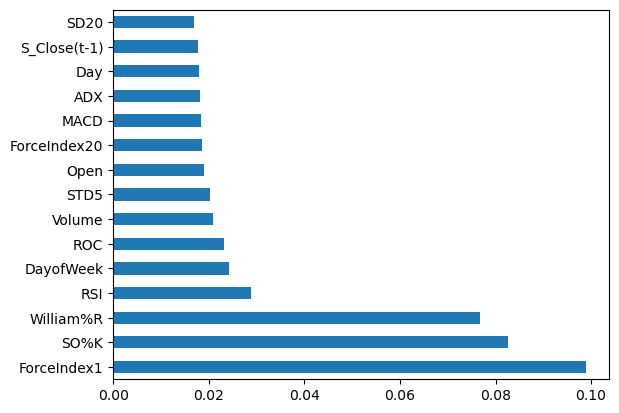

In [19]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

### 5.2. Revealing features with highest importance

In [20]:
X = df[['MACD','Volume','STD5','Day','DayofWeek','ROC','RSI','SO%K',
       'ForceIndex1','William%R','SD20','S_Close(t-1)','ADX',
        'ForceIndex20','Open']]

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MACD          2473 non-null   float64
 1   Volume        2473 non-null   int64  
 2   STD5          2473 non-null   float64
 3   Day           2473 non-null   int64  
 4   DayofWeek     2473 non-null   int64  
 5   ROC           2473 non-null   float64
 6   RSI           2473 non-null   float64
 7   SO%K          2473 non-null   float64
 8   ForceIndex1   2473 non-null   float64
 9   William%R     2473 non-null   float64
 10  SD20          2473 non-null   float64
 11  S_Close(t-1)  2473 non-null   float64
 12  ADX           2473 non-null   float64
 13  ForceIndex20  2473 non-null   float64
 14  Open          2473 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 289.9 KB


## 6. Model selection

### 6.1. Scaling and splitting the selected features

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=12)

### 6.2. Logistic Regression for classification

In [23]:
logmodel = LogisticRegression(max_iter=1000) ##max no. of iterations reached ,so 1000 used
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
predictions = logmodel.predict(X_test)

In [25]:
print(classification_report(y_test,predictions, zero_division=1))

              precision    recall  f1-score   support

           1       0.85      0.81      0.83       253
           2       0.81      0.85      0.83       242

    accuracy                           0.83       495
   macro avg       0.83      0.83      0.83       495
weighted avg       0.83      0.83      0.83       495



## 7. Scaling and splitting the dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

## 8. Using Sigmoid activation function 

In [27]:
# Define two functions - the sigmoid activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [28]:
input_size = X_train_scaled.shape[1]
output_size = 1
learning_rate = 0.01

weights = np.random.randn(input_size, output_size)
bias = np.zeros((1, output_size))

In [29]:
num_iterations = 1000

for i in range(num_iterations):
    # Forward pass
    z = np.dot(X_train_scaled, weights) + bias
    a = sigmoid(z)

    # Compute loss (log loss)
    epsilon = 1e-8
    loss = -np.mean(y_train * np.log(a + epsilon) + (1 - y_train) * np.log(1 - a + epsilon))

    # Backpropagation
    dz = a - y_train.reshape(-1, 1)
    dw = np.dot(X_train_scaled.T, dz) / len(X_train_scaled)
    db = np.sum(dz) / len(X_train_scaled)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

    # Print the loss for every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss}")

Iteration 0, Loss: 1.4713799077100609
Iteration 100, Loss: 0.2309987835459459
Iteration 200, Loss: -0.5637085356426342
Iteration 300, Loss: -1.1236187811934528
Iteration 400, Loss: -1.568363150618599
Iteration 500, Loss: -1.9544015268409094
Iteration 600, Loss: -2.309558978940539
Iteration 700, Loss: -2.647893724408783
Iteration 800, Loss: -2.9760227868220372
Iteration 900, Loss: -3.297805221678526


In [30]:
labels = [1, 2]
test_predictions = sigmoid(np.dot(X_test_scaled, weights) + bias)
test_predictions = (test_predictions > 0.5).astype(int)

# Calculate accuracy and log loss on the test data
accuracy = accuracy_score(y_test, test_predictions)
logloss = log_loss(y_test, test_predictions)

print(f"Accuracy: {accuracy}")
print(f"Log Loss: {logloss}")

Accuracy: 0.46464646464646464
Log Loss: 16.74755612019585


## 9. Hyperparameter tuning

### 9.1. Hyperparameter tuning using Grid Search CV and Random Forest Classifier

In [31]:
y_train = y_train.ravel()
y_test = y_test.ravel()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50],
    'max_depth': [20],
    'min_samples_split': [5]
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found by Grid Search
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test data
best_rf_classifier = grid_search.best_estimator_
test_predictions = best_rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.8424242424242424


### From hyperparameter tuning using Grid Search CV and Random Forest Classifier we get slighlty better accuracy than the accuracy without tuning. 

### 9.2. Hyperparameter tuning using Grid search CV and Logistic Regression

In [32]:
y_train=y_train.ravel()

In [33]:
logmodel = LogisticRegression(penalty= None, max_iter=1000)

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': [None, 'balanced']
}

In [35]:
grid_search = GridSearchCV(logmodel, param_grid, cv=5, scoring='accuracy',error_score='raise', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best hyperparameters:',best_params)
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best hyperparameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8222222222222222


### From hyperparameter tuning using Grid Search CV and Logistic Regression we get slighlty less accuracy than the accuracy without tuning. So, this model is not suitable.